In [1]:
# import warnings filter 
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Importing Dask packages
import dask.dataframe as dd
import dask.array as da

#import otheer needed python packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Extracting the dataset online
import os
import wget

# To prevent duplication of datasets when re-running
path = '/home/qwerty/Documents/COVID19-time-series-analysis/covid19_data.csv'
os.remove('/home/qwerty/Documents/COVID19-time-series-analysis/covid19_data.csv')

url =  "https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv"
wget.download(url, '/home/qwerty/Documents/COVID19-time-series-analysis/covid19_data.csv')

# Reading the dataset 
dataset = dd.read_csv('covid19_data.csv', dtype={'Confirmed': 'float64','Deaths': 'float64', 'Lat':'float64', 'long':'float64'})

FileNotFoundError: [Errno 2] No such file or directory: '/home/qwerty/Documents/COVID19-time-series-analysis/covid19_data.csv'

In [1]:
dataset.head()

NameError: name 'dataset' is not defined

In [4]:
dataset.compute().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30438 entries, 0 to 30437
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            30438 non-null  object 
 1   Country/Region  30438 non-null  object 
 2   Province/State  9348 non-null   object 
 3   Lat             30438 non-null  float64
 4   Long            30438 non-null  float64
 5   Confirmed       30324 non-null  float64
 6   Recovered       28842 non-null  float64
 7   Deaths          30324 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.9+ MB


In [5]:
#Parsing the 'Date' feature to a date datatype 
dataset['Date'] = dd.to_datetime(dataset['Date'], infer_datetime_format=True) 

In [7]:
dataset.compute().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30438 entries, 0 to 30437
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            30438 non-null  datetime64[ns]
 1   Country/Region  30438 non-null  object        
 2   Province/State  9348 non-null   object        
 3   Lat             30438 non-null  float64       
 4   Long            30438 non-null  float64       
 5   Confirmed       30324 non-null  float64       
 6   Recovered       28842 non-null  float64       
 7   Deaths          30324 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 1.9+ MB


In [6]:
# Checking for missing values
dataset.isnull().sum().compute()

Date                  0
Country/Region        0
Province/State    21090
Lat                   0
Long                  0
Confirmed           114
Recovered          1596
Deaths              114
dtype: int64

In [ ]:
### Query the missing data 

In [7]:
dataset.compute().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30438 entries, 0 to 30437
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            30438 non-null  datetime64[ns]
 1   Country/Region  30438 non-null  object        
 2   Province/State  9348 non-null   object        
 3   Lat             30438 non-null  float64       
 4   Long            30438 non-null  float64       
 5   Confirmed       30324 non-null  float64       
 6   Recovered       28842 non-null  float64       
 7   Deaths          30324 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 1.9+ MB


In [8]:
dataset.columns

Index(['Date', 'Country/Region', 'Province/State', 'Lat', 'Long', 'Confirmed',
       'Recovered', 'Deaths'],
      dtype='object')

In [9]:
# Query the relevant features
dataset = dataset[['Date','Country/Region',
                   'Confirmed', 'Deaths', 'Recovered']]

In [10]:
dataset.head()

,Date,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Afghanistan,0.0,0.0,0.0
1,2020-01-23,Afghanistan,0.0,0.0,0.0
2,2020-01-24,Afghanistan,0.0,0.0,0.0
3,2020-01-25,Afghanistan,0.0,0.0,0.0
4,2020-01-26,Afghanistan,0.0,0.0,0.0


In [11]:
datewise_df = dataset.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [12]:
datewise_df.head()

,Confirmed,Recovered,Deaths
Date,,,
2020-01-22,555.0,28.0,17.0
2020-01-23,654.0,30.0,18.0
2020-01-24,941.0,36.0,26.0
2020-01-25,1434.0,39.0,42.0
2020-01-26,2118.0,52.0,56.0


In [13]:
nic = len(dataset["Country/Region"].unique())
cfm_cases = datewise_df["Confirmed"].compute().iloc[-1]
rec = datewise_df["Recovered"].compute().iloc[-1]
deaths = datewise_df["Deaths"].compute().iloc[-1]
active_cases = cfm_cases - rec- deaths
closed_cases = rec + deaths

In [14]:
def overview():
    print('=== COVID-19 Global Overview ===')
    print(f'== Number of countries which infected:{nic} ==')
    print(f'== Total num of confirmed cases:{cfm_cases} ==')
    print(f'== Total num of recovered cases:{rec} ==')
    print(f'== Total num of deaths:{deaths}')
    print(f'== Total num of Active cases around the world:{active_cases} ==')
    print(f'== Total num of Closed cases around the world:{closed_cases} ==')
    
overview()

=== COVID-19 Global Overview ===
== Number of countries which infected:188 ==
== Total num of confirmed cases:4442163.0 ==
== Total num of recovered cases:1587893.0 ==
== Total num of deaths:302418.0
== Total num of Active cases around the world:2551852.0 ==
== Total num of Closed cases around the world:1890311.0 ==


In [15]:
datewise_df.head()

,Confirmed,Recovered,Deaths
Date,,,
2020-01-22,555.0,28.0,17.0
2020-01-23,654.0,30.0,18.0
2020-01-24,941.0,36.0,26.0
2020-01-25,1434.0,39.0,42.0
2020-01-26,2118.0,52.0,56.0


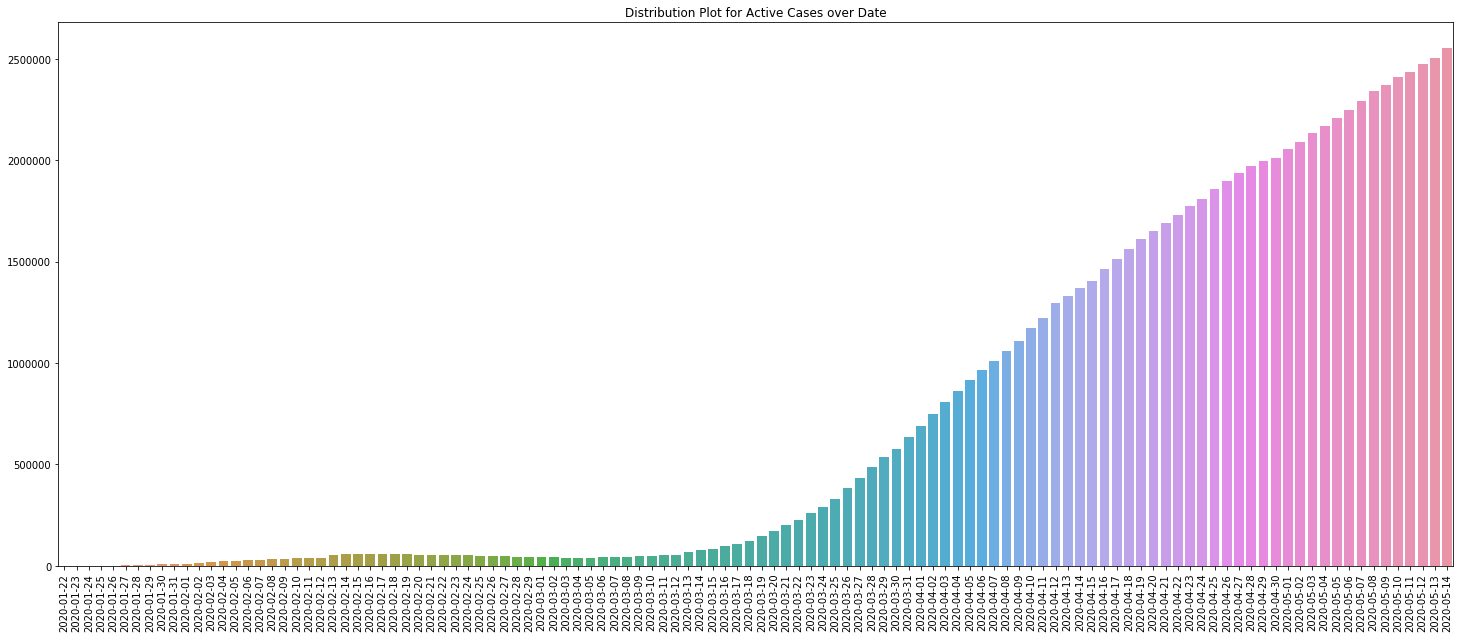

In [16]:
# Plotting the distribution on active cases
plt.figure(figsize=(25,10))
sns.barplot(x=datewise_df.compute().index.date, y = datewise_df["Confirmed"].compute()-datewise_df["Recovered"].compute()-datewise_df["Deaths"].compute())
plt.title("Distribution Plot for Active Cases over Date")
plt.xticks(rotation=90)
plt.savefig('Active Cases Cases over Date.png');

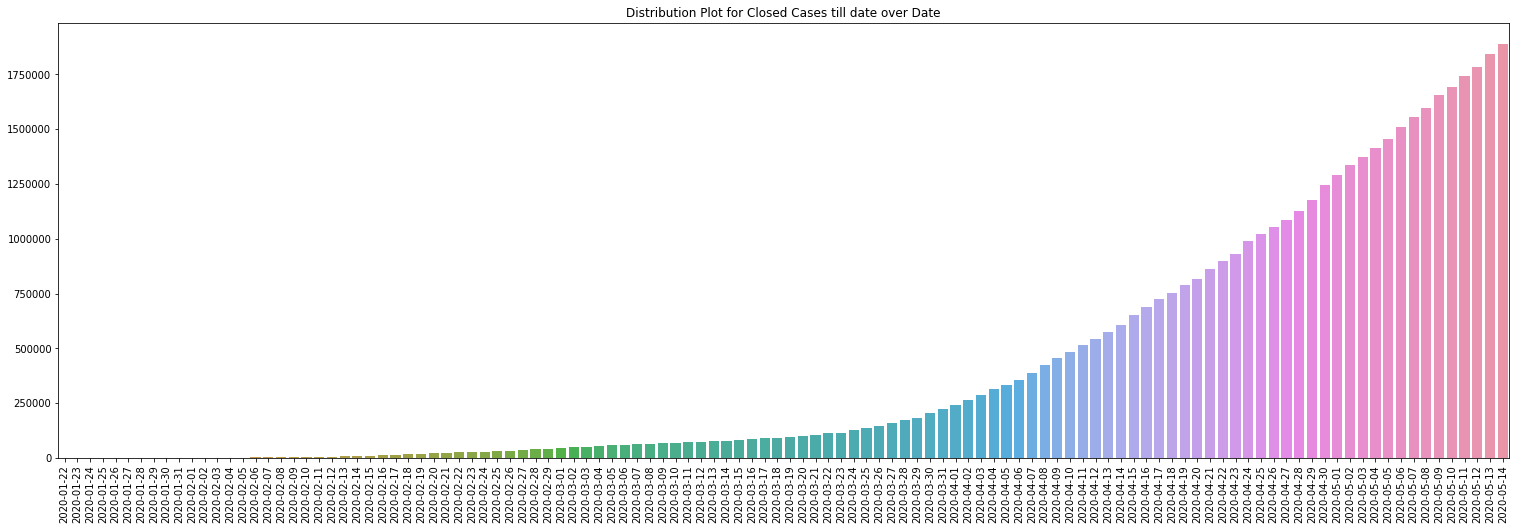

In [17]:
# Plotting distribution of closed cases
plt.figure(figsize=(26,8))
sns.barplot(x=datewise_df.compute().index.date, y = datewise_df["Recovered"].compute() + datewise_df["Deaths"].compute())
plt.xticks(rotation=90)
plt.title("Distribution Plot for Closed Cases till date over Date")
plt.savefig('Closed Cases Cases over Date.png');

In [18]:
woy = datewise_df.compute().index.weekofyear
datewise_df = datewise_df.compute()
datewise_df["WeekOfYear"] = woy

In [19]:
datewise_df.head()

,Confirmed,Recovered,Deaths,WeekOfYear
Date,,,,
2020-01-22,555.0,28.0,17.0,4
2020-01-23,654.0,30.0,18.0,4
2020-01-24,941.0,36.0,26.0,4
2020-01-25,1434.0,39.0,42.0,4
2020-01-26,2118.0,52.0,56.0,4


In [20]:
week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
counter=1
for i in list(datewise_df["WeekOfYear"].unique()):
    weekwise_confirmed.append(datewise_df[datewise_df["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise_df[datewise_df["WeekOfYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise_df[datewise_df["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num.append(counter)
    counter=counter+1

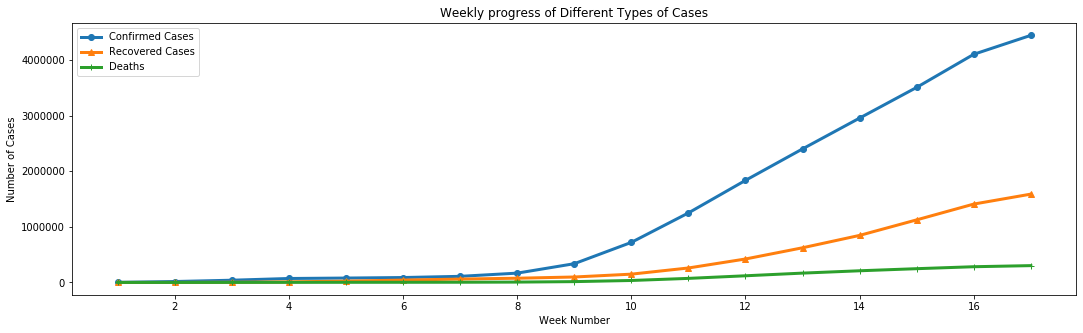

In [21]:
plt.figure(figsize=(18,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3,marker="o", label='Confirmed Cases')
plt.plot(week_num,weekwise_recovered,linewidth=3,marker="^", label='Recovered Cases')
plt.plot(week_num,weekwise_deaths,linewidth=3,marker="+", label='Deaths')
plt.ylabel("Number of Cases")
plt.xlabel("Week Number")
plt.title("Weekly progress of Different Types of Cases")
plt.legend();

In [1]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,5))
sns.barplot(x=week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmed Cases")
ax2.set_ylabel("Number of Death Cases")
ax1.set_title("Weekly increase in Number of Confirmed Cases")
ax2.set_title("Weekly increase in Number of Death Cases");

NameError: name 'plt' is not defined

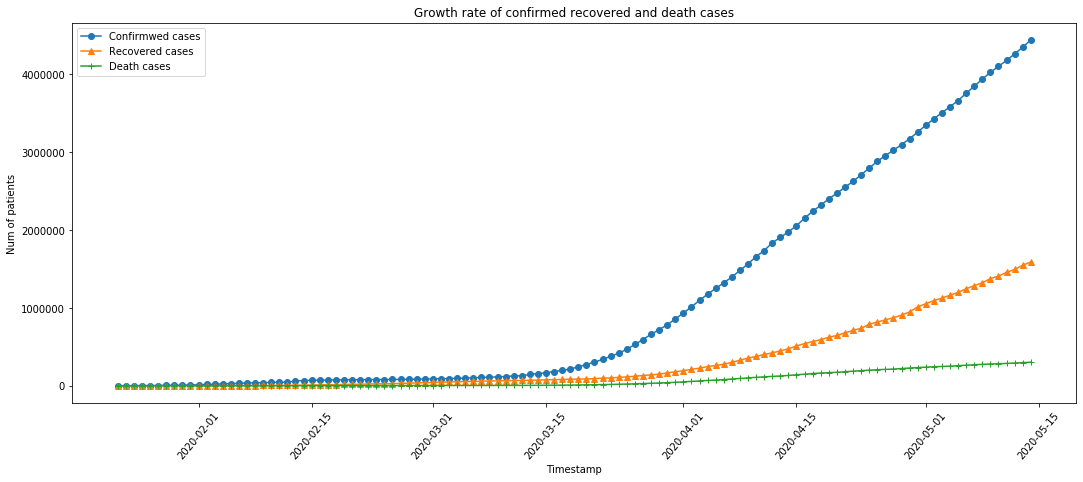

In [23]:
plt.figure(figsize=(18,7))
plt.plot(datewise_df["Confirmed"],marker="o",label="Confirmwed cases")
plt.plot(datewise_df["Recovered"],marker="^",label="Recovered cases")
plt.plot(datewise_df["Deaths"],marker="+",label="Death cases")
plt.xticks(rotation="50")
plt.ylabel("Num of patients")
plt.xlabel("Timestamp")
plt.title("Growth rate of confirmed recovered and death cases")
plt.legend();

In [24]:

#Calculating the Mortality Rate and Recovery Rate
datewise_df["Mortality Rate"] = (datewise_df["Deaths"]/datewise_df["Confirmed"])*100 
datewise_df["Recovery Rate"] = (datewise_df["Recovered"]/datewise_df["Confirmed"])*100 
datewise_df["Active Cases"] = (datewise_df["Confirmed"]-datewise_df["Recovered"]-datewise_df["Deaths"]) 
datewise_df["Closed Cases"] = (datewise_df["Deaths"]+datewise_df["Recovered"])


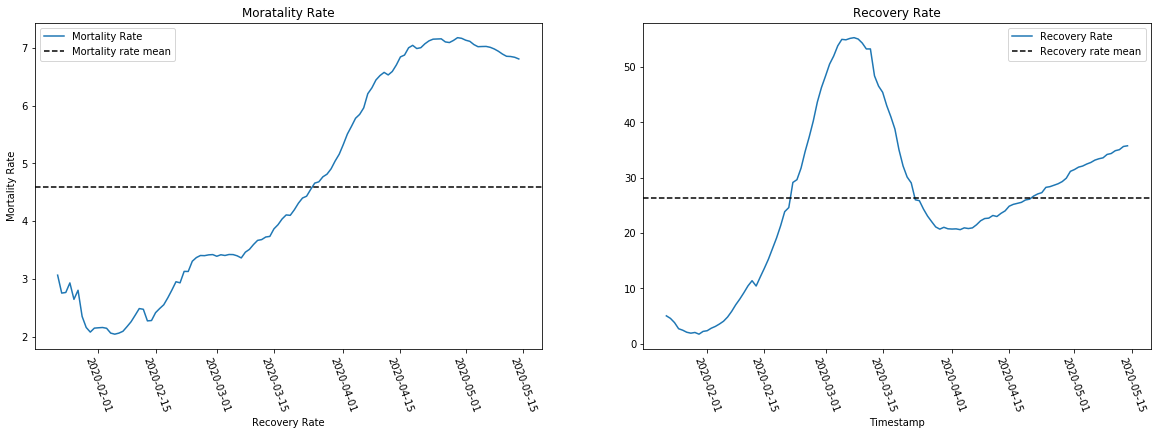

In [25]:
# ploting mortality and Recovery rate
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
ax1.plot(datewise_df["Mortality Rate"],label="Mortality Rate")
ax2.plot(datewise_df["Recovery Rate"],label="Recovery Rate")
ax1.set_title("Moratality Rate")
ax2.set_title("Recovery Rate")
ax1.set_xlabel("Timestamp")
ax2.set_xlabel("Timestamp")
ax1.set_ylabel("Mortality Rate")
ax1.set_xlabel("Recovery Rate")
for tick in ax1.get_xticklabels():
    tick.set_rotation(-70)
for tick in ax2.get_xticklabels():
    tick.set_rotation(-70)
ax1.axhline(datewise_df["Mortality Rate"].mean(),label="Mortality rate mean", linestyle="--", color='black')
ax2.axhline(datewise_df["Recovery Rate"].mean(),label="Recovery rate mean", linestyle="--", color='black')
ax2.legend()
ax1.legend();

In [58]:
def moratality_recovery_overview():
    print("Average mortality rate mean", datewise_df["Mortality Rate"].mean())
    print("Average mortality rate median", datewise_df["Mortality Rate"].median())
    print("Average recovery rate mean", datewise_df["Recovery Rate"].mean())
    print("Average recovery rate median", datewise_df["Recovery Rate"].median())
    print("Average Increase in number of confirmed cases every day :",da.round(datewise_df["Confirmed"].diff().fillna(0).mean()))
    print("Average Increase in number of recovered cases every day :",da.round(datewise_df["Recovered"].diff().fillna(0).mean()))
    print("Average Increase in number of death cases every day :",da.round(datewise_df["Deaths"].diff().fillna(0).mean()))
    
moratality_recovery_overview()

Average mortality rate mean 4.331547735634356
Average mortality rate median 3.786877785090073
Average recovery rate mean 25.70457805514983
Average recovery rate median 25.018809604576266


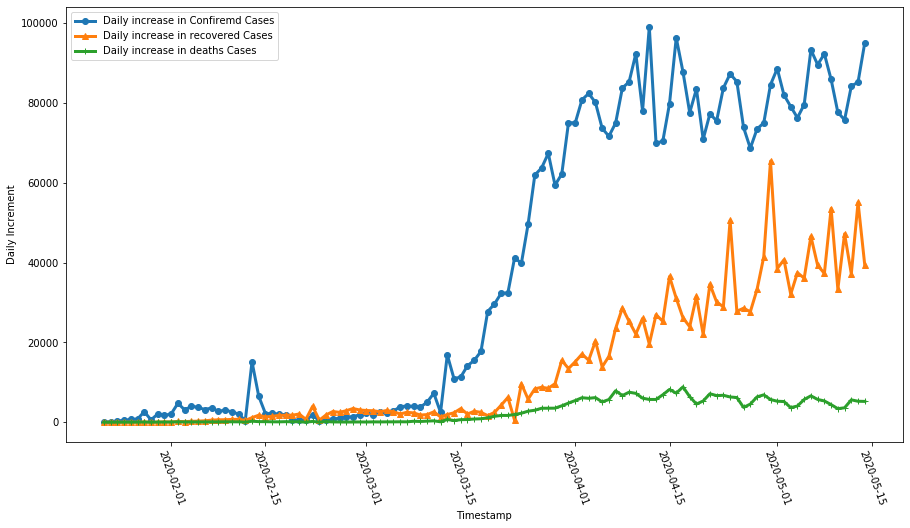

In [26]:
plt.figure(figsize=(15,8))
plt.plot(datewise_df["Confirmed"].diff().fillna(0),label="Daily increase in Confiremd Cases",linewidth=3,marker="o")
plt.plot(datewise_df["Recovered"].diff().fillna(0),label="Daily increase in recovered Cases",linewidth=3,marker="^")
plt.plot(datewise_df["Deaths"].diff().fillna(0),label="Daily increase in deaths Cases",linewidth=3,marker="+")
plt.legend()
plt.xticks(rotation=-70)
plt.ylabel("Daily Increment")
plt.xlabel("Timestamp");

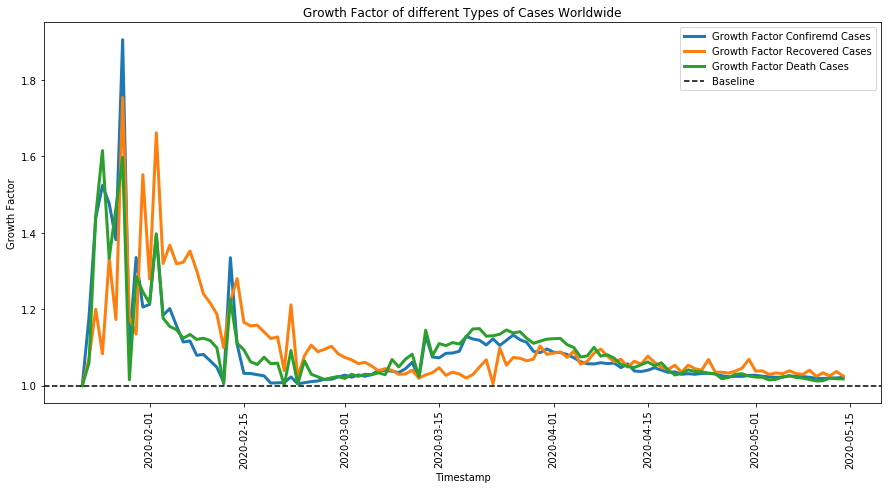

In [27]:
daily_increase_confirm=[]
daily_increase_recovered=[]
daily_increase_deaths=[]
for i in range(datewise_df.shape[0]-1):
    daily_increase_confirm.append(((datewise_df["Confirmed"].iloc[i+1]/datewise_df["Confirmed"].iloc[i])))
    daily_increase_recovered.append(((datewise_df["Recovered"].iloc[i+1]/datewise_df["Recovered"].iloc[i])))
    daily_increase_deaths.append(((datewise_df["Deaths"].iloc[i+1]/datewise_df["Deaths"].iloc[i])))
daily_increase_confirm.insert(0,1)
daily_increase_recovered.insert(0,1)
daily_increase_deaths.insert(0,1)

plt.figure(figsize=(15,7))
plt.plot(datewise_df.index,daily_increase_confirm,label="Growth Factor Confiremd Cases",linewidth=3)
plt.plot(datewise_df.index,daily_increase_recovered,label="Growth Factor Recovered Cases",linewidth=3)
plt.plot(datewise_df.index,daily_increase_deaths,label="Growth Factor Death Cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Growth Factor")
plt.title("Growth Factor of different Types of Cases Worldwide")
plt.axhline(1,linestyle='--',color='black',label="Baseline")
plt.xticks(rotation=90)
plt.legend();

In [ ]:
### Geological mapping